In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

## Environment parameters

CPRG parameters used in the experiment

Parameter | Value
---- | ---
$N_{max}$ | 1000
$r_g$ |  0.5
$\alpha$ | 0.35
$\beta$ | 0.4
$X_{min}$ | 100
$X_{max}$ | 500
$c$ | 0.5

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  del sys.path[0]


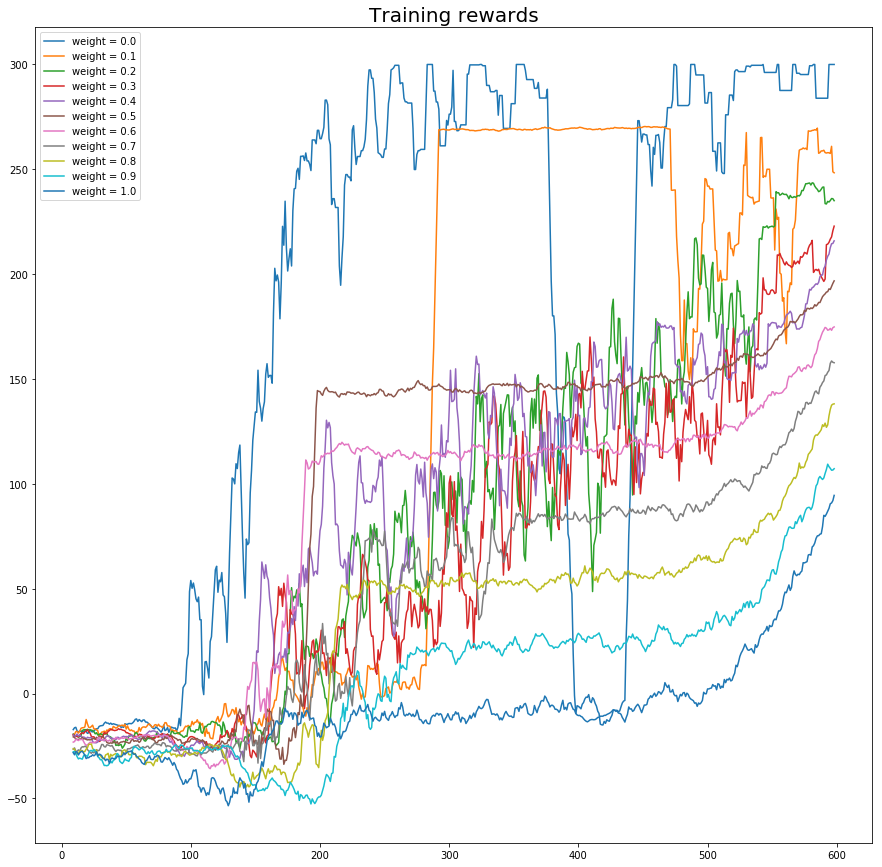

In [2]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))

fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'avg_score.txt'

        df = pd.read_csv(file_name, header=None)
        df.columns = ["r"]
        df = pd.rolling_mean(df, 10)
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

plt.title("Training rewards", fontsize=20)
plt.legend(legends)
plt.show()

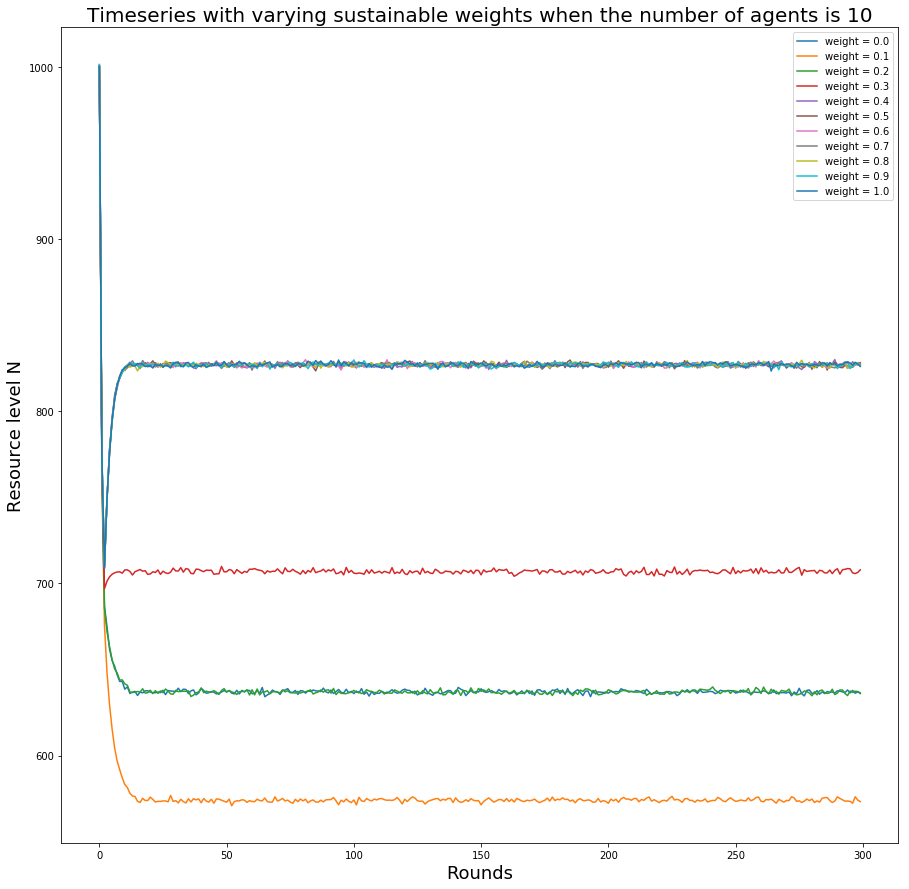

In [3]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))
fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'test_resource_level.txt'
        df = pd.read_csv(file_name, header=None)
        noise = np.random.normal(0, 1, df.shape)
        df += noise
        df.columns = ["r"]
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

plt.title("Timeseries with varying sustainable weights when the number of agents is 10", fontsize=20)
plt.ylabel('Resource level N', fontsize=18)
plt.xlabel('Rounds', fontsize=18)
plt.legend(legends)
plt.show()

In [4]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))

results_dict = defaultdict(dict)

for dir_name in model_list:
    weight = dir_name.split('_')[1]
    n_agents = dir_name.split('_')[2]

    file_name = log_dir + dir_name + '/' + 'test_resource_level.txt'
    df = pd.read_csv(file_name, header=None)
    df.columns = ["r"]
    results_dict[weight][n_agents] = int(df.iloc[-1:]["r"])

re_level = np.zeros((11, 10), dtype=int)

for index1, weight in enumerate(np.linspace(0.0, 1.0, 11)):
    for index2, n in enumerate(range(1, 11)):
        # print("{0:.1f}".format(weight), str(n))
        re_level[index1][index2] = int(results_dict["{0:.1f}".format(weight)][str(n)])


df = pd.DataFrame(data=re_level, index=np.linspace(0.0, 1.0, 11,dtype=np.float64), columns=range(1, 11))
df.index = df.index.map(lambda x:"{0:.1f}".format(x))

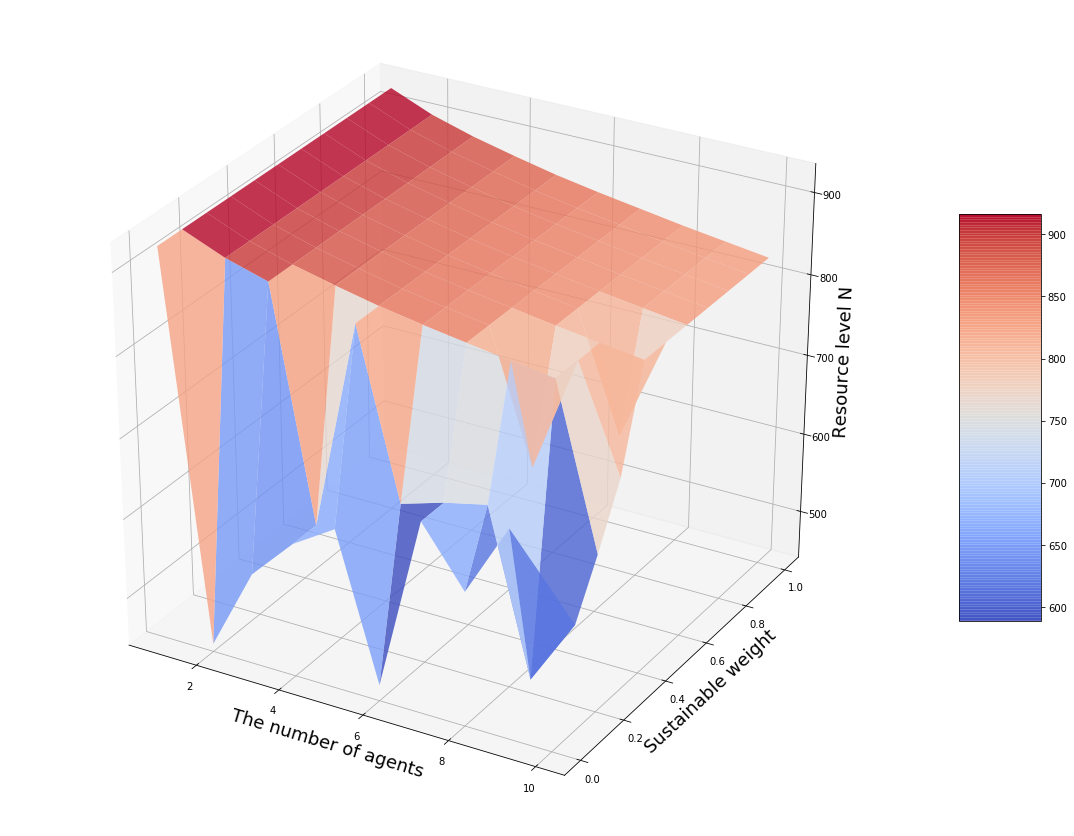

In [5]:
X_plot = np.linspace(0.0, 1.0, 11)
Y_plot = np.arange(1, 11)
X_plot,Y_plot = np.meshgrid(X_plot,Y_plot)
Z_plot = df
fig=plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
ax.set_ylabel('Sustainable weight', fontsize=18)
ax.set_xlabel('The number of agents', fontsize=18)
ax.set_zlabel('Resource level N', fontsize=18)
surf = ax.plot_surface(Y_plot, X_plot, Z_plot.T, rstride=1,cstride=1,cmap=cm.coolwarm,alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

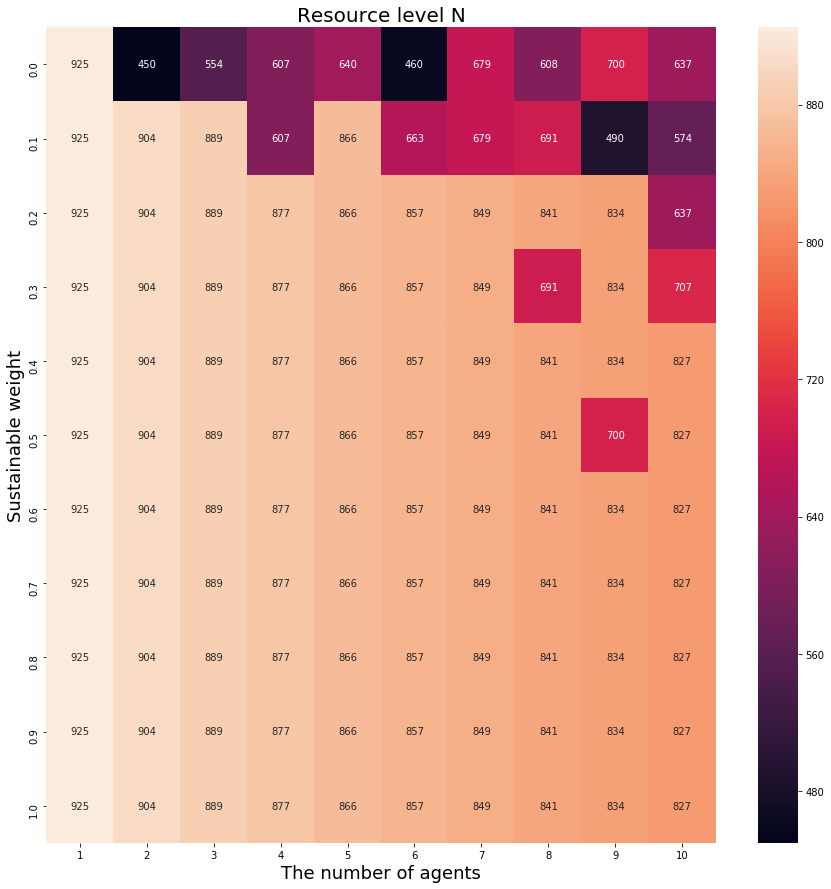

In [6]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df, annot=True, fmt="d")
plt.ylabel('Sustainable weight', fontsize=18)
plt.xlabel('The number of agents', fontsize=18)
plt.title("Resource level N", fontsize=20)
plt.show()

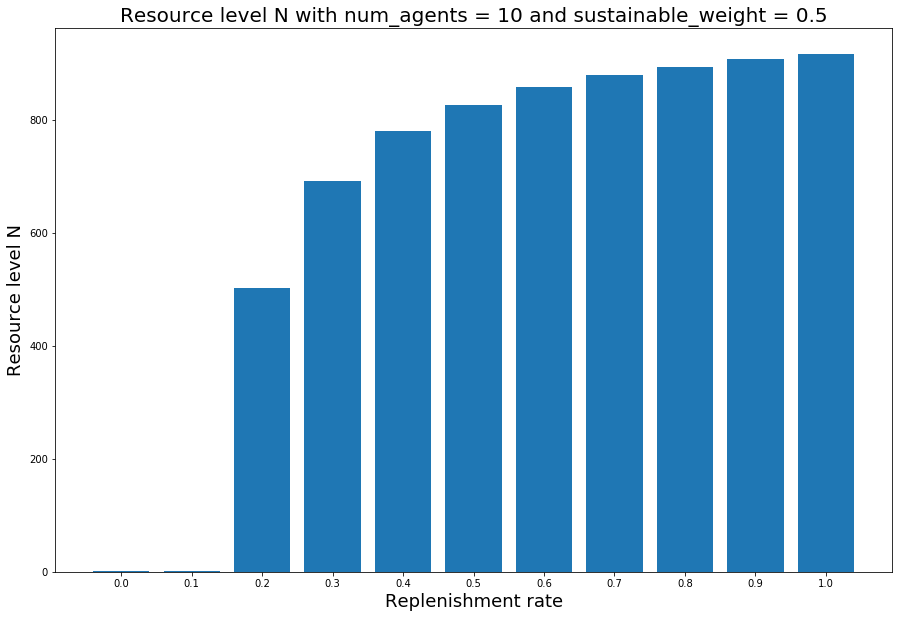

In [7]:
log_dir = "log/agent_model/_0.5_10/"
file_list = sorted(os.listdir(log_dir))[:11]
fig = plt.figure(num=None, figsize=(15, 10))

rl_list = []
r = []
for dir_name in file_list:
    r.append(dir_name.split("_")[0])
    file_name = log_dir + dir_name
    df = pd.read_csv(file_name, header=None)
    df.columns = ["r"]
    rl_list.append(int(df.iloc[-1:]["r"]))

ind = np.arange(len(r))
plt.bar(ind, rl_list)
plt.xticks(ind, r)
plt.ylabel('Resource level N', fontsize=18)
plt.xlabel('Replenishment rate', fontsize=18)
plt.title("Resource level N with num_agents = 10 and sustainable_weight = 0.5", fontsize=20)
plt.show()

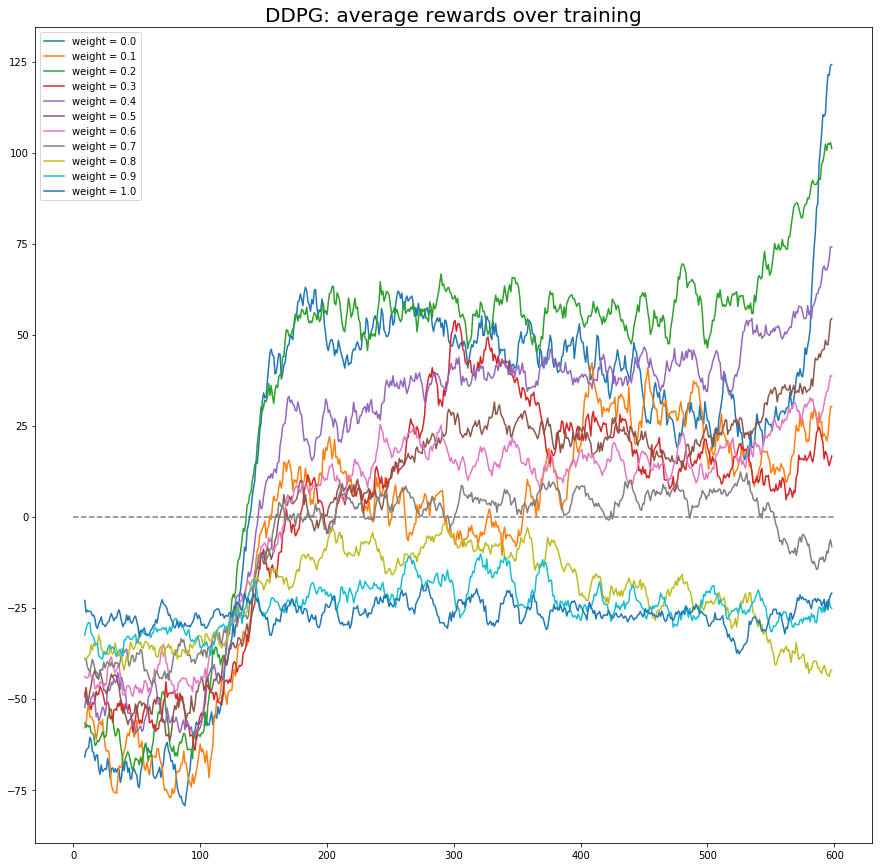

In [91]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))

fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'ddpg_avg_score.txt'
        try:
            df = pd.read_csv(file_name, header=None)
        except:
            break
        df.columns = ["r"]
        df = df.rolling(window=10,center=False).mean()
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

x = np.linspace(0.1, 2*np.pi, 10)
plt.hlines(0, 0, 600, linestyle = "dashed", color='grey')
plt.title("DDPG: average rewards over training", fontsize=20)
plt.legend(legends)
plt.show()

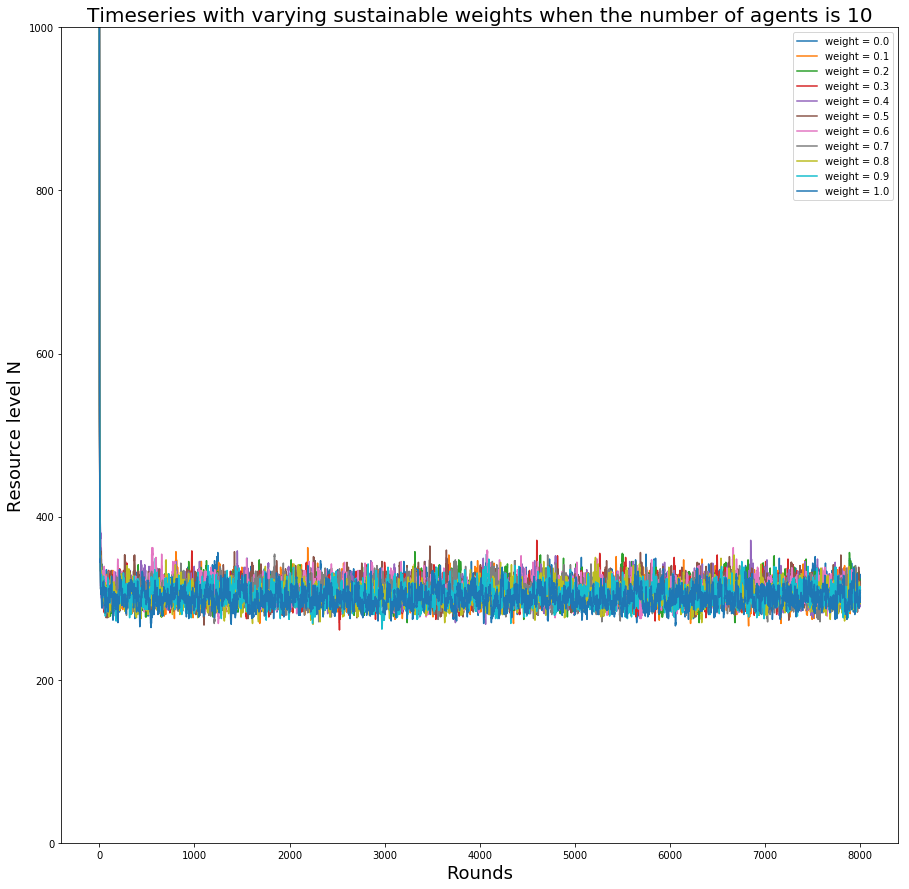

In [92]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))
fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'ddpg_test_resource_level.txt'
        df = pd.read_csv(file_name, header=None)
        df.columns = ["r"]
        # df = df.rolling(window=1,center=False).mean()
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

plt.title("Timeseries with varying sustainable weights when the number of agents is 10", fontsize=20)
plt.ylabel('Resource level N', fontsize=18)
plt.ylim(0, 1000)
plt.xlabel('Rounds', fontsize=18)
plt.legend(legends)
plt.show()

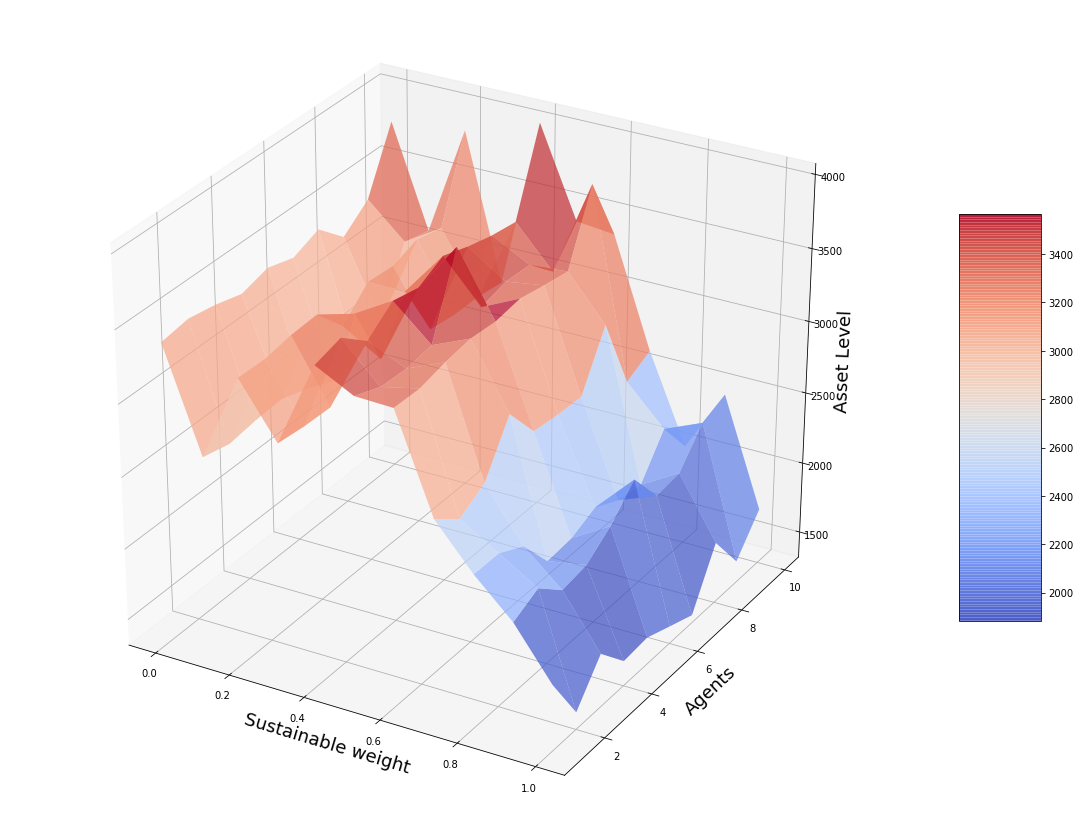

In [93]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))

df = pd.DataFrame(index=["agent_" + str(i) for i in range(10)])

for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        weight = dir_name.split('_')[1]

        file_name = log_dir + dir_name + '/' + 'ddpg_test_assets.txt'
        ast = pd.read_csv(file_name, header=None)
        ast.columns = [weight]
        ast.index = ["agent_" + str(i) for i in range(10)]
        df[weight] = ast[weight]

X_plot = np.linspace(0.0, 1.0, 11)
Y_plot = np.arange(1, 11)
X_plot,Y_plot = np.meshgrid(X_plot,Y_plot)
Z_plot = df
fig=plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
ax.set_ylabel('Agents', fontsize=18)
ax.set_xlabel('Sustainable weight', fontsize=18)
ax.set_zlabel('Asset Level', fontsize=18)
surf = ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1,cstride=1,cmap=cm.coolwarm,alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

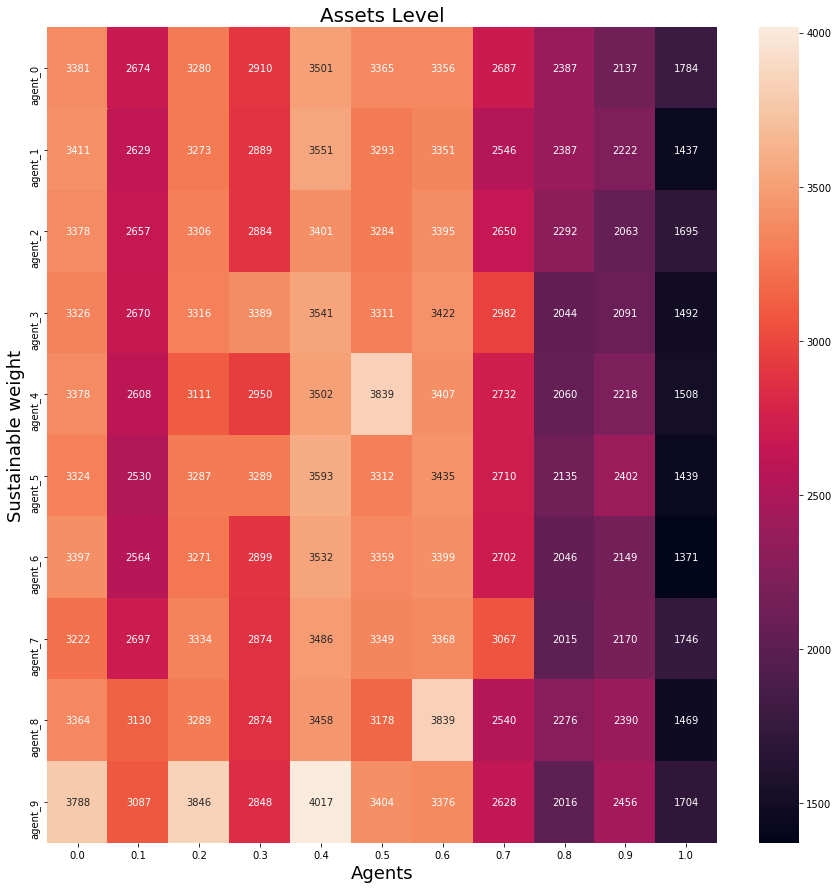

In [94]:
import seaborn as sns
df = df.astype('int')
plt.figure(figsize=(15,15))
sns.heatmap(df, annot=True, fmt="d")
plt.ylabel('Sustainable weight', fontsize=18)
plt.xlabel('Agents', fontsize=18)
plt.title("Assets Level", fontsize=20)
plt.show()

In [36]:
re_level = np.zeros((11, 10), dtype=int)

for index1, weight in enumerate(np.linspace(0.0, 1.0, 11)):
    for index2, n in enumerate(range(1, 11)):
        # print("{0:.1f}".format(weight), str(n))
        re_level[index1][index2] = int(results_dict["{0:.1f}".format(weight)][str(n)])


df = pd.DataFrame(data=re_level, index=np.linspace(0.0, 1.0, 11,dtype=np.float64), columns=range(1, 11))
df.index = df.index.map(lambda x:"{0:.1f}".format(x))

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
agent0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agent9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


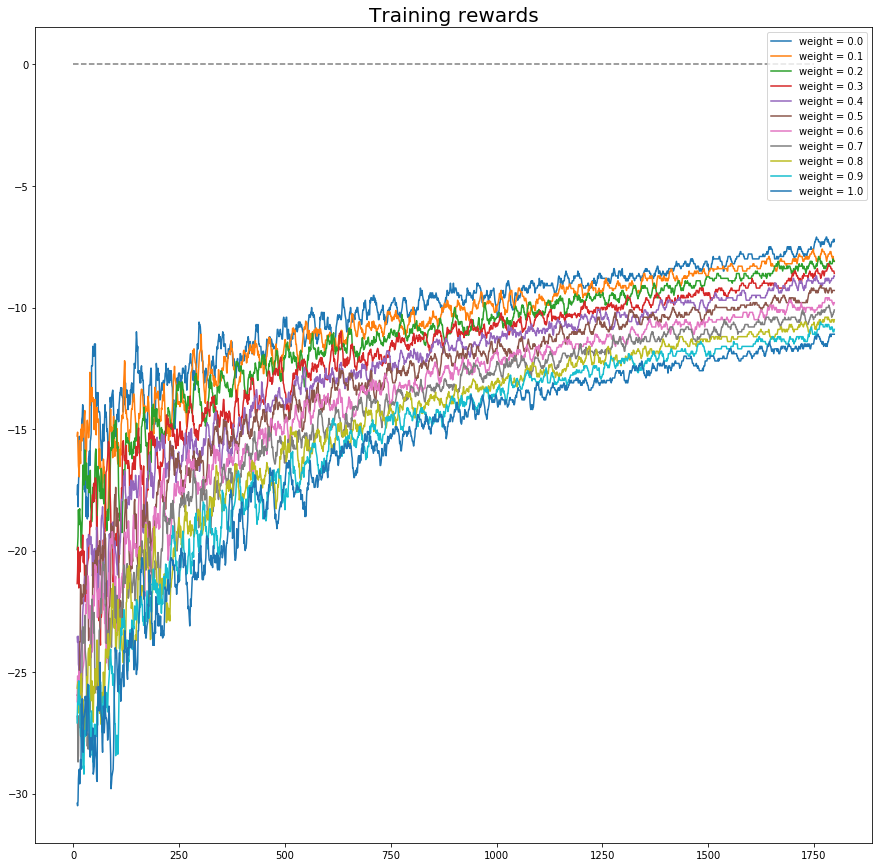

In [10]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))

fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'dqn_avg_score.txt'
        try:
            df = pd.read_csv(file_name, header=None)
        except:
            break
        df.columns = ["r"]
        df = pd.rolling_mean(df, 10)
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

plt.title("Training rewards", fontsize=20)
plt.legend(legends)
plt.hlines(0, 0, 1750, linestyle = "dashed", color='grey')
plt.show()

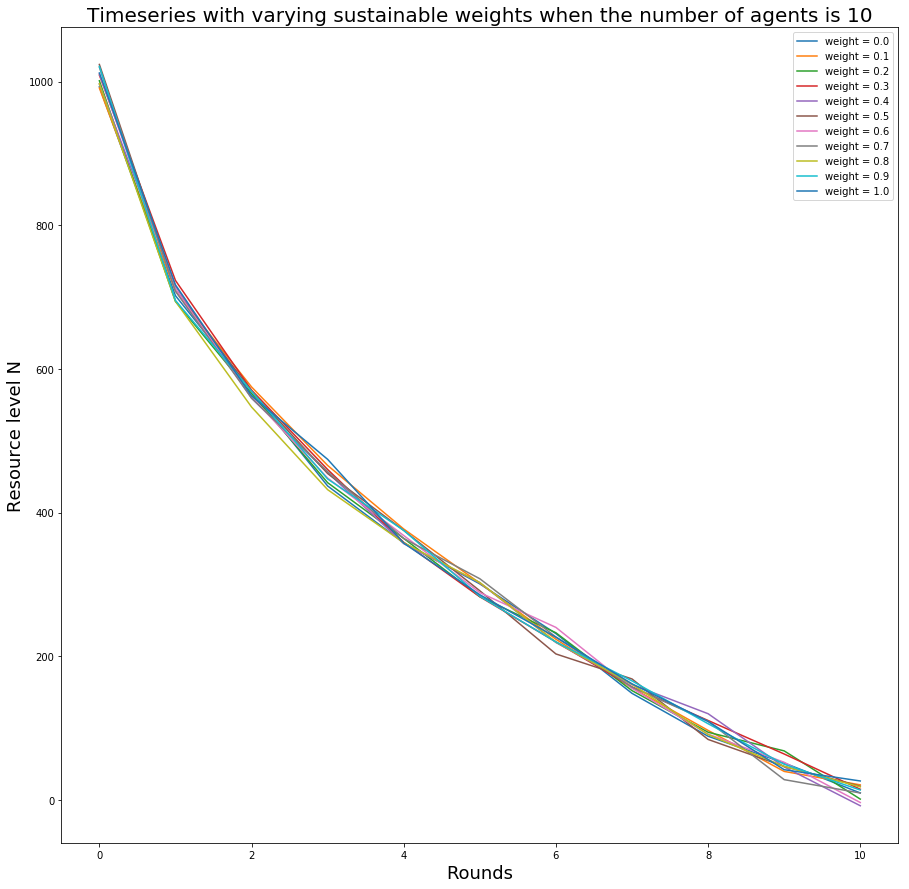

In [12]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))
fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'dqn_0.5_test_resource_level.txt'
        try:
            df = pd.read_csv(file_name, header=None)
        except:
            break
            
        noise = np.random.normal(0, 10, df.shape)
        df += noise
        df.columns = ["r"]
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

plt.title("Timeseries with varying sustainable weights when the number of agents is 10", fontsize=20)
plt.ylabel('Resource level N', fontsize=18)
plt.xlabel('Rounds', fontsize=18)
plt.legend(legends)
plt.show()